# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = study_results.merge(mouse_metadata, how = "left", on = "Mouse ID" )

# Display the data table for preview
merged_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_count = len(merged_df["Mouse ID"].unique())
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
timepoint = merged_df.duplicated(subset = ["Mouse ID", "Timepoint"])
merged_timepoint = merged_df.loc[timepoint, "Mouse ID"]
#print(merged_timepoint)
merged_timepoint.unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_df = pd.DataFrame(merged_df.loc[merged_df["Mouse ID"] == "g989", :])
duplicate_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = pd.DataFrame(merged_df.loc[merged_df["Mouse ID"] != "g989", :])
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_mouse_count = len(clean_df["Mouse ID"].unique())
cleaned_mouse_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# # make a new dataframe grouped by drug regimen
grouped_clean_dfgb = clean_df.groupby("Drug Regimen")
summary_df = grouped_clean_dfgb.agg({"Tumor Volume (mm3)":["mean","median", "var", "std", "sem"]})
summary_df = summary_df.rename(columns = {"mean": "Mean Tumor Volume", "median": "Median Tumor Volume",
                         "var":"Tumor Volume Variance", "std":"Tumor Volume Std. Dev.", 
                         "sem": "Tumor Volume Std. Err."})
summary_df
# Assemble the resulting series into a single summary DataFrame.

# # get the mean, median, mode, std dev, std error, and SEM of each regimen and put in a df


Tumor Volume (mm3)                                            \
              Mean Tumor Volume Median Tumor Volume Tumor Volume Variance   
Drug Regimen                                                                
Capomulin             40.675741           41.557809             24.947764   
Ceftamin              52.591172           51.776157             39.290177   
Infubinol             52.884795           51.820584             43.128684   
Ketapril              55.235638           53.698743             68.553577   
Naftisol              54.331565           52.509285             66.173479   
Placebo               54.033581           52.288934             61.168083   
Propriva              52.320930           50.446266             43.852013   
Ramicane              40.216745           40.673236             23.486704   
Stelasyn              54.233149           52.431737             59.450562   
Zoniferol             53.236507           51.818479             48.533355   

                                                            
             Tumor Volume Std. Dev. Tumor Volume Std. Err.  
Drug Regimen                                                
Capomulin                  4.994774               0.329346  
Ceftamin                   6.268188               0.469821  
Infubinol                  6.567243               0.492236  
Ketapril                   8.279709               0.603860  
Naftisol                   8.134708               0.596466  
Placebo                    7.821003               0.581331  
Propriva                   6.622085               0.544332  
Ramicane                   4.846308               0.320955  
Stelasyn                   7.710419               0.573111  
Zoniferol                  6.966589               0.516398

In [40]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
grouped_clean_dfgb = clean_df.groupby("Drug Regimen")
summary_df = grouped_clean_dfgb.agg({"Tumor Volume (mm3)":["mean","median", "var", "std", "sem"]})
summary_df = summary_df.rename(columns = {"mean": "Mean Tumor Volume", "median": "Median Tumor Volume",
                         "var":"Tumor Volume Variance", "std":"Tumor Volume Std. Dev.", 
                         "sem": "Tumor Volume Std. Err."})
summary_df

Tumor Volume (mm3)                                            \
              Mean Tumor Volume Median Tumor Volume Tumor Volume Variance   
Drug Regimen                                                                
Capomulin             40.675741           41.557809             24.947764   
Ceftamin              52.591172           51.776157             39.290177   
Infubinol             52.884795           51.820584             43.128684   
Ketapril              55.235638           53.698743             68.553577   
Naftisol              54.331565           52.509285             66.173479   
Placebo               54.033581           52.288934             61.168083   
Propriva              52.320930           50.446266             43.852013   
Ramicane              40.216745           40.673236             23.486704   
Stelasyn              54.233149           52.431737             59.450562   
Zoniferol             53.236507           51.818479             48.533355   

                                                            
             Tumor Volume Std. Dev. Tumor Volume Std. Err.  
Drug Regimen                                                
Capomulin                  4.994774               0.329346  
Ceftamin                   6.268188               0.469821  
Infubinol                  6.567243               0.492236  
Ketapril                   8.279709               0.603860  
Naftisol                   8.134708               0.596466  
Placebo                    7.821003               0.581331  
Propriva                   6.622085               0.544332  
Ramicane                   4.846308               0.320955  
Stelasyn                   7.710419               0.573111  
Zoniferol                  6.966589               0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

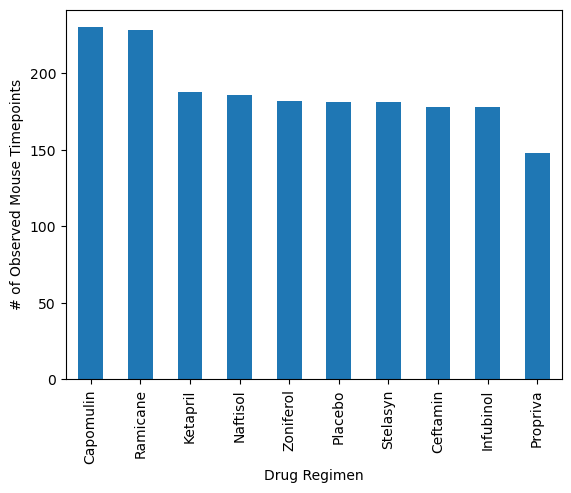

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
value_counts = clean_df.value_counts("Drug Regimen")
value_counts.plot(kind = "bar", ylabel = "# of Observed Mouse Timepoints")

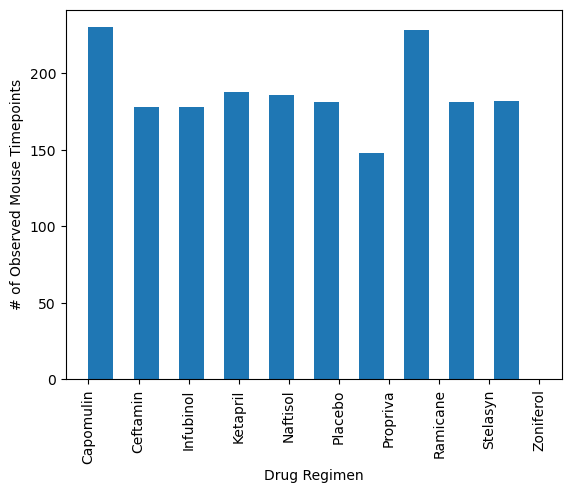

In [46]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
sorted_clean_df = clean_df.sort_values(by = "Drug Regimen")
plt.hist(sorted_clean_df["Drug Regimen"], width = .5)
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

<Axes: ylabel='Sex'>

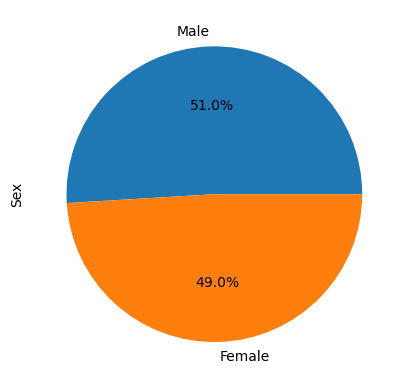

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = clean_df.value_counts("Sex")
gender_counts.plot(kind = "pie", ylabel= 'Sex', autopct='%1.1f%%')

Text(0, 0.5, 'Sex')

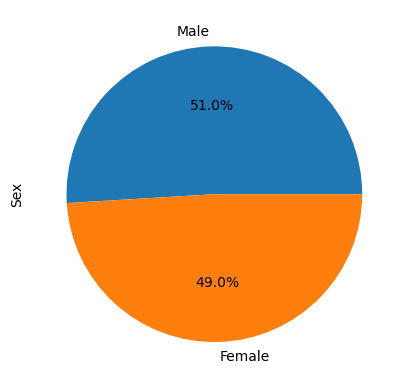

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = ["Male", "Female"]
plt.pie(gender_counts, autopct="%1.1f%%", labels = gender)
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [71]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_reg_df = pd.DataFrame(clean_df.loc[clean_df["Drug Regimen"] == "Capomulin", :])
ramicane_reg_df = pd.DataFrame(clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :])
infubinol_reg_df = pd.DataFrame(clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :])
ceftamin_reg_df = pd.DataFrame(clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :])

# Start by getting the last (greatest) timepoint for each mouse
latest_df = pd.DataFrame(clean_df.loc[clean_df["Timepoint"] == 45, :])

group_latest_df = clean_df.groupby(["Timepoint"])
group_latest_df.head()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
250,a275,5,46.795257,0,Ceftamin,Female,20,28
251,w575,5,48.913860,1,Zoniferol,Female,16,28
252,x822,5,45.671104,1,Ceftamin,Male,3,29
253,l509,5,45.851193,0,Capomulin,Male,17,21
254,n304,5,46.431216,0,Naftisol,Male,9,26


In [68]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
capo_quartile = capomulin_reg_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
capo_lowerq = capo_quartile[0.25]
capo_upperq = capo_quartile[0.75]
capo_iqr = capo_upperq-capo_lowerq
print(f"Capomulin: IQR = {capo_iqr}")
capo_lower_bound = capo_lowerq - (1.5*capo_iqr)
capo_upper_bound = capo_upperq + (1.5*capo_iqr)
print(f"Capomulin: The lower bound is {capo_lower_bound} and the upper bound is {capo_upper_bound}")

rami_quartile = ramicane_reg_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
rami_lowerq = rami_quartile[0.25]
rami_upperq = rami_quartile[0.75]
rami_iqr = rami_upperq-rami_lowerq
print(f"Ramicane: IQR = {rami_iqr}")
rami_lower_bound = rami_lowerq - (1.5*rami_iqr)
rami_upper_bound = rami_upperq + (1.5*rami_iqr)
print(f"Ramicane: The lower bound is {rami_lower_bound} and the upper bound is {rami_upper_bound}")

infu_quartile = infubinol_reg_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
infu_lowerq = infu_quartile[0.25]
infu_upperq = infu_quartile[0.75]
infu_iqr = infu_upperq-infu_lowerq
print(f"Infubinol: IQR = {infu_iqr}")
infu_lower_bound = infu_lowerq - (1.5*infu_iqr)
infu_upper_bound = infu_upperq + (1.5*infu_iqr)
print(f"Infubinol: The lower bound is {infu_lower_bound} and the upper bound is {infu_upper_bound}")

ceft_quartile = ceftamin_reg_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
ceft_lowerq = ceft_quartile[0.25]
ceft_upperq = ceft_quartile[0.75]
ceft_iqr = ceft_upperq-ceft_lowerq
print(f"Ceftamin: IQR = {ceft_iqr}")
ceft_lower_bound = ceft_lowerq - (1.5*ceft_iqr)
ceft_upper_bound = ceft_upperq + (1.5*ceft_iqr)
print(f"Ceftamin: The lower bound is {ceft_lower_bound} and the upper bound is {ceft_upper_bound}")
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin: IQR = 7.314067135000002
Capomulin: The lower bound is 26.714832162499995 and the upper bound is 55.9711007025
Ramicane: IQR = 8.325365415
Ramicane: The lower bound is 24.1865864625 and the upper bound is 57.488048122500004
Infubinol: IQR = 10.002090667500006
Infubinol: The lower bound is 32.309217298749985 and the upper bound is 72.31757996875001
Ceftamin: IQR = 9.593010457500007
Ceftamin: The lower bound is 32.81891142624998 and the upper bound is 71.19095325625001


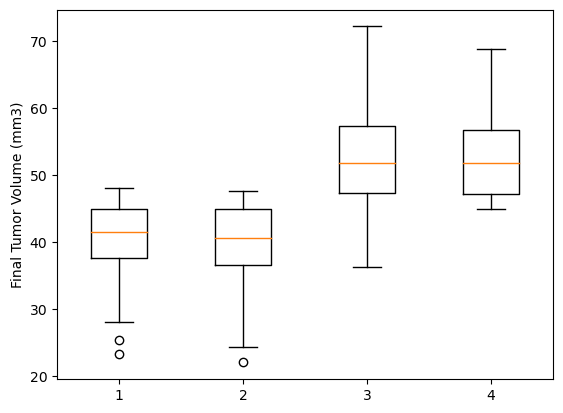

In [52]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
box_dict = {
    "capo":capomulin_reg_df["Tumor Volume (mm3)"],
    "rami":ramicane_reg_df["Tumor Volume (mm3)"],
    "infu":infubinol_reg_df["Tumor Volume (mm3)"],
    "ceft":ceftamin_reg_df["Tumor Volume (mm3)"]
}
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(box_dict.values())
plt.show()

## Line and Scatter Plots

In [53]:
# df of only l509 mouse
single_mouse_df = pd.DataFrame(merged_df.loc[merged_df["Mouse ID"] == "l509", :])

Text(0, 0.5, 'Tumor Volume (mm3)')

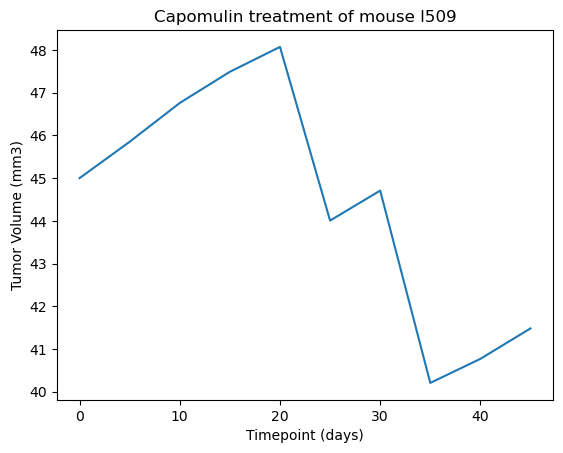

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plt.plot(single_mouse_df["Timepoint"], single_mouse_df["Tumor Volume (mm3)"])
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")


In [54]:
# df of only mice that were treated with Capomulin
capomulin_df = pd.DataFrame(merged_df.loc[merged_df["Drug Regimen"] == "Capomulin", :])

Text(0, 0.5, 'Average Tumor Volume (mm3)')

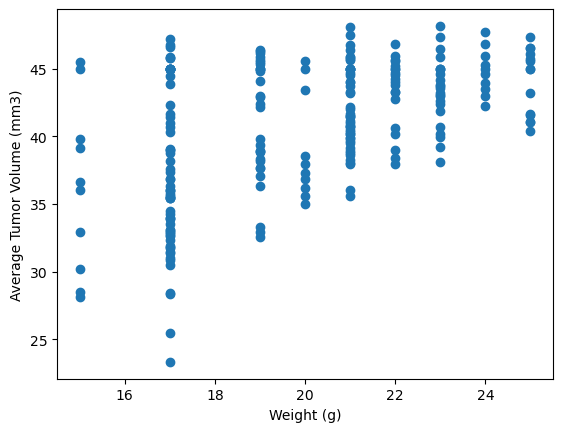

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(capomulin_df["Weight (g)"], capomulin_df["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")


## Correlation and Regression

In [55]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# x_values = capomulin_df["Weight (g)"]
# y_values = capomulin_df["Tumor Volume (mm3)"]
# (slope, intercept, rvalue, pvalue, stderr) = st(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(capomulin_df["Weight (g)"], capomulin_df["Tumor Volume (mm3)"])
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(20, 25),fontsize=15,color="red")
# plt.xlabel("Weight (g)")
# plt.ylabel("Average Tumor Volume (mm3)")
# print(f"The correlation between mouse weight and the average tumor volume is {rvalue**2}")
# plt.show()

TypeError: 'module' object is not callable